In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
!wget https://archive.ics.uci.edu/static/public/2/adult.zip

In [ ]:
!unzip '/content/adult.zip'

In [64]:
train_df = pd.read_csv('adult.data', header=None)
test_df = pd.read_csv('adult.test', skiprows=1, header=None)

In [6]:
train_df.shape, test_df.shape

((32561, 15), (16281, 15))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16281 non-null  int64 
 1   1       16281 non-null  object
 2   2       16281 non-null  int64 
 3   3       16281 non-null  object
 4   4       16281 non-null  int64 
 5   5       16281 non-null  object
 6   6       16281 non-null  object
 7   7       16281 non-null  object
 8   8       16281 non-null  object
 9   9       16281 non-null  object
 10  10      16281 non-null  int64 
 11  11      16281 non-null  int64 
 12  12      16281 non-null  int64 
 13  13      16281 non-null  object
 14  14      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
col = ['Age','Workclass','Final Weight','Education','Education Number of Years','Marital-status','Occupation',
'Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country']

In [66]:
col_name = dict(zip(train_df, col))

In [67]:
train_df = train_df.rename(columns=col_name)
test_df = test_df.rename(columns=col_name)

In [68]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:,-1]
X_test = test_df.drop([14], axis=1)
y_test = test_df[14]

In [69]:
temp_df = pd.concat([X_train, X_test], axis=0)
temp_df_num = pd.get_dummies(temp_df)

In [70]:
X_train = temp_df_num[:X_train.shape[0]]
X_test = temp_df_num[X_train.shape[0]:]

In [71]:
y_train.unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
y_test.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [72]:
y_test = [label.rstrip('. ') for label in y_test]

In [73]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [ ]:
lr_cls = LogisticRegression()
lr_cls.fit(X_train, y_train)
y_pred_lr = lr_cls.predict(X_test)

In [76]:
acc_lr = accuracy_score(y_test, y_pred_lr)
fscr_lr = f1_score(y_test, y_pred_lr, pos_label=' >50K')
acc_lr, fscr_lr

(0.850991953811191, 0.6518369690011481)

In [77]:
y_train = y_train.astype('category').cat.codes
y_test = pd.Series(y_test).astype('category').cat.codes

xgb_cls = XGBClassifier()
xgb_cls.fit(X_train, y_train)
y_pred_xgb = xgb_cls.predict(X_test)

In [78]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
fscr_xgb = f1_score(y_test, y_pred_xgb)
acc_xgb, fscr_xgb

(0.8705853448805356, 0.7036984952889889)

In [79]:
metric_df = pd.DataFrame({'model':'LogReg', 'accuracy':[acc_lr], 'f1score':[fscr_lr]})

In [81]:
metric_df = metric_df.append({'model':'XGB', 'accuracy':acc_xgb, 'f1score':fscr_xgb}, ignore_index=True)

,model,accuracy,f1score
0,LogReg,0.850992,0.651837
1,XGB,0.870585,0.703698


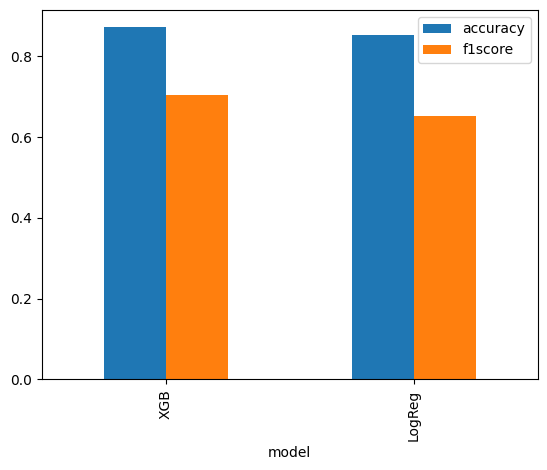

In [86]:
metric_df = metric_df.sort_values(['f1score'], ascending=False)
metric_df.plot(kind='bar', x='model', y=['accuracy','f1score']);

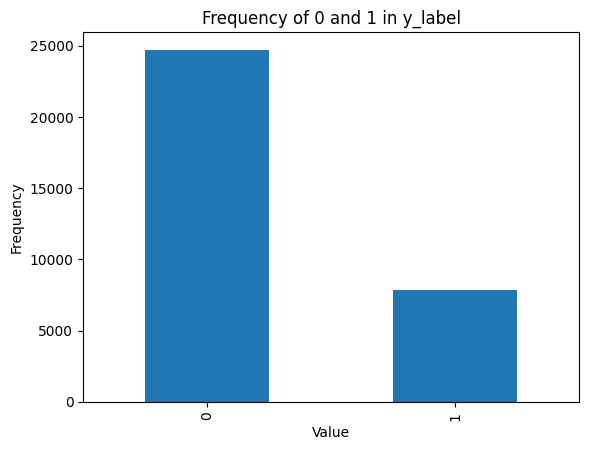

In [96]:
value_counts = y_train.value_counts()

value_counts.plot(kind='bar')
plt.title('Frequency of 0 and 1 in y_label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

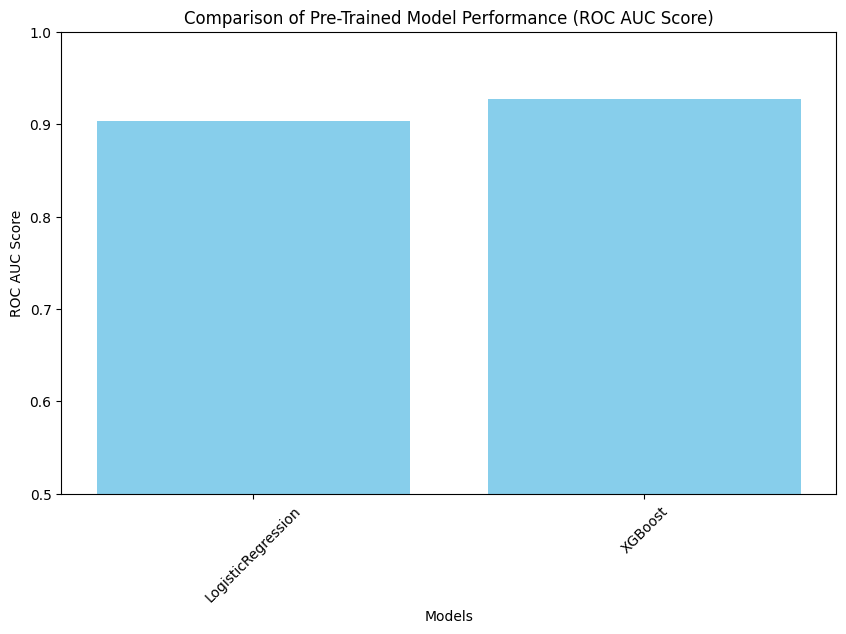

In [99]:
# Function to evaluate a pre-trained model and return its ROC AUC score
def evaluate_pretrained_model(model, X_test, y_test):
    predictions = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predictions)
    return roc_auc

pretrained_models = {
    "LogisticRegression": lr_cls,
    "XGBoost": xgb_cls,
}

roc_auc_scores = {name: evaluate_pretrained_model(model, X_test, y_test) for name, model in pretrained_models.items()}

plt.figure(figsize=(10, 6))
plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Pre-Trained Model Performance (ROC AUC Score)')
plt.ylim([0.5, 1.0])
plt.xticks(rotation=45)
plt.show()